# NMDS plot of taxonomic clusters by sites / treatments

In [60]:
# R.Version()

# 1) Import data

In [61]:
# Import OTU Table
# OTU_v <- read.table("../data/iTaggerOTUs/SF_Sal_OTU_VSTcpm.txt", sep='\t', header=T, row.names=1)                   # dim(OTU_v); head(OTU_v)

OTU_v <- read.table("../silvaOTUs/Silva_OTU_VSTcpm.txt", sep='\t', header=T, row.names=1)                   # dim(OTU_v); head(OTU_v)

# Sort OTU table                                                                      
otu_V <-OTU_v[order(OTU_v$Consensus.lineage),]                                  # sort by lineage  


In [62]:
# Import site colors
site_colors <- read.table("../data/colors/Sal_siteColors_testR.txt", sep='\t', header=T, row.names=1)          # site_colors
site_colours <- (site_colors$Salpal3_col)                                                                   # only color
site_col <- site_colours

# Get list from vector, move inside functions?
#site_col <- levels(site_colours)[as.numeric(site_colours)]  # collect levels, as.numeric preserves ordering
#site_col

In [63]:
# Import Sample mapping
metaDB <-read.table("../data/meta/SF_sal_meta_FIX3b_gap_fill_MDS.txt", sep="\t", header=TRUE)          # Import Metadata, keep all    
#metaDB <-read.table("SF_sal_meta_FIX3b.txt", sep="\t", header=TRUE)          # Import Metadata, keep all    
row.names(metaDB) <- metaDB$Sample                                          # Row names are samples for phyloseq             
metaDB = metaDB[,-1]      
#head(metaDB)

# 2) Data manipulation

 ### a) Gap filling (not needed here)

In [64]:
# Manually filled: NO3_N, Fe, Mn, Cu, Zn

#To be gapfilled (0.5*min):  NO2_pw, NO3_pw, NH3_pw, PO4_pw,#  Zn_pw, K_pw

### b) adjust metadata 

In [65]:
# Get matching OTU samples and metadata samples (now done by preprocess?)
# Get Sample names in OTU table               
OTU_samps <- data.frame('Sample'=colnames(otu_V))                #OTU_samps

# Merge site order and Samples
Meta_iTag <- merge(metaDB, OTU_samps, by='Sample')               #colnames(metaDB)
rownames(Meta_iTag) <- Meta_iTag$Sample

# Resort meta itag by index
indexer = 'EWsiteHyd_index'
Meta_iTag <- Meta_iTag[order(Meta_iTag[indexer]),]
colnames(Meta_iTag)

[1] "Sample"           "EWsiteHyd_index"  "MG_name"          "Index"           
 [5] "Location"         "Pl_Sp"            "EWcoastGroup"     "SALTgroup"       
 [9] "LU"               "Depth"            "EW.no"            "iTag_name.x"     
[13] "Site_indx"        "Salinity.x"       "Bulk_dens"        "H2O_FPS"         
[17] "CO2_mg_m2_h"      "CO2_soilC_mg_g_d" "CH4_ug_m2_h"      "CH4_CO2"         
[21] "CH4_soilC_ug_g_d" "pH"               "Cl"               "SO4"             
[25] "Corg_LOI"         "C"                "N"                "P"               
[29] "NO3_N"            "NH4_N"            "Olsen_P"          "CN"              
[33] "CP"               "NP"               "NP_ext"           "NO3_NH4"         
[37] "C_g_m2"           "N_g_m2"           "P_g_m2"           "Fe"              
[41] "Mn"               "Cu"               "Zn"               "Salinity.y"      
[45] "CO2_mg_m2_h.1"    "CH4_ug_m2_h.1"    "Cl_pw"            "SO4_pw"          
[49] "DOC_mg_L"         "NO2_pw"           "NO3_pw"           "NH3_pw"          
[53] "PO4_pw"           "Fe_pw"            "Mn_pw"            "Co_pw"           
[57] "Cu_pw"            "Zn_pw"            "Ca_pw"            "Sr_pw"           
[61] "Mg_pw"            "Na_pw"            "K_pw"             "Al_pw"           
[65] "Si_pw"            "Br_pw"            "F_pw"

In [66]:
# Reorder factors as needed
# Reorder location factor
Meta_iTag$Location <-factor(Meta_iTag$Location, levels=c("Sandmound","WestPond","Mayberry","Browns","RushRanch","Joice","Goodyear","WhiteSlough","Tolay","ChinaCamp","Muzzi"))  #head(Meta_iTag)
Meta_iTag$Pl_Sp <-factor(Meta_iTag$Pl_Sp, levels=c("Cattail","Tule","ThreeSq","CattailNL","Phrag","PW","Cord"))

# Def NMDS vars
# Prepare data, cats for NMDS plot  -- move up to top or in function?
Location <-Meta_iTag$Location                                                    # Get Location vector from meta_iTag
Restor <- Meta_iTag$EWcoastGroup
Plant <- Meta_iTag$Pl_Sp

make sure data used for NMDS is NUMERIC

In [67]:
chem_cols <- sapply(Meta_iTag, is.numeric)  
Env_chem <- Meta_iTag[chem_cols]

select only some variables

In [68]:
### Select and rename vars

keep_vars <-c('Salinity.x', 'Bulk_dens', 'CO2_mg_m2_h', 'CH4_ug_m2_h', 'C', 'N', 'P', 'N_g_m2', #'C_g_m2', 
              'CN','NP', 'NO3_N', 'NH4_N', 'DOC_mg_L')#, 'NO2_pw','NO3_pw','NH3_pw',)#,

Env_chem <-Env_chem[keep_vars]

### CAREFUL HERE, lazy renaming... comment out when testing newvars.
colnames(Env_chem) <-c('Salinity', 'BD', 'CO2', 'CH4', 'C', 'N', 'P', 'N_g/m2',                  #'C_m2', 
                       'C:N', 'N:P', 'NO3_s', 'NH4_s', 'DOC')#, 'NO2_pw','NO3_pw','NH3_pw')
head(Env_chem)

,Salinity,BD,CO2,CH4,C,N,P,N_g/m2,C:N,N:P,NO3_s,NH4_s,DOC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sandmound_TuleA_D1,0.5934254,0.2653691,1.481020,4.4730640,14.90,1.068,0.104,425.1213,15.93126,22.70859,0.120,33.42,9.863
Sandmound_TuleA_D2,0.5934254,0.2743267,1.481020,4.4730640,14.98,0.965,0.090,397.0879,19.20271,23.71030,0.630,48.13,9.863
Sandmound_TuleB_D1,0.6026209,0.2479678,4.173351,-0.2829401,15.15,1.088,0.110,404.6835,15.89565,21.87199,0.700,28.59,11.770
Sandmound_TuleB_D2,0.6026209,0.2584306,4.173351,-0.2829401,13.59,0.923,0.090,357.7972,18.80040,22.67834,0.800,35.32,11.770
Sandmound_TuleC_D1,0.5664683,0.2404236,1.764464,0.9258838,16.45,1.103,0.114,397.7809,16.81077,21.39552,0.420,30.00,17.800
Sandmound_TuleC_D2,0.5664683,0.2696643,1.764464,0.9258838,13.27,0.941,0.085,380.6312,17.49891,24.48065,0.715,21.19,17.800


# 3) Plot NMDS by site

In [79]:
source("../modules/4_OTU_plotting_module_NMDS_1.7.r")

Square root transformation
Wisconsin double standardization
Run 0 stress 0.06596923 
Run 1 stress 0.06596911 
... New best solution
... Procrustes: rmse 0.0001303356  max resid 0.001561008 
... Similar to previous best
Run 2 stress 0.06586722 
... New best solution
... Procrustes: rmse 0.004459169  max resid 0.05440139 
Run 3 stress 0.06596912 
... Procrustes: rmse 0.004481969  max resid 0.05451694 
Run 4 stress 0.0659691 
... Procrustes: rmse 0.004472072  max resid 0.05446793 
Run 5 stress 0.06586749 
... Procrustes: rmse 0.0001936428  max resid 0.001658515 
... Similar to previous best
Run 6 stress 0.06596908 
... Procrustes: rmse 0.004463796  max resid 0.05444289 
Run 7 stress 0.06596908 
... Procrustes: rmse 0.004475613  max resid 0.05448743 
Run 8 stress 0.06596915 
... Procrustes: rmse 0.004471174  max resid 0.05446597 
Run 9 stress 0.06596933 
... Procrustes: rmse 0.004485987  max resid 0.05452531 
Run 10 stress 0.06596912 
... Procrustes: rmse 0.004472256  max resid 0.05446893 

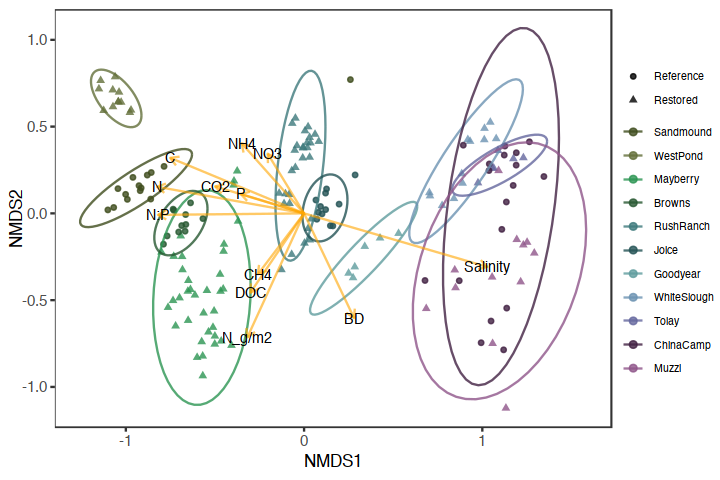

In [70]:
# Plot NMDS
options(repr.plot.width=6, repr.plot.height=4)

NMDS <- NMDS_group_shape_fit(otu_V, Location, Restor, Env_chem)
NMDS

# 4) Plot NMDS by plant species

- unfortunately, the color scheme variable "site_col" is hard coded into the NMDS plotting module
- here, replace this with a new palette for plant species:

In [71]:
library(scales) # for making a new color scale

In [72]:
# inspect levels of "Plant variable" - calculated above from metaDB/Meta_iTag
unique(Plant)

[1] Tule      Cattail   ThreeSq   CattailNL Phrag     Cord      PW       
Levels: Cattail Tule ThreeSq CattailNL Phrag PW Cord

In [73]:
site_col = hue_pal()(7)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.06596923 
Run 1 stress 0.06586663 
... New best solution
... Procrustes: rmse 0.004437434  max resid 0.05442058 
Run 2 stress 0.06596914 
... Procrustes: rmse 0.00443467  max resid 0.05442423 
Run 3 stress 0.0658666 
... New best solution
... Procrustes: rmse 4.833849e-05  max resid 0.0002520763 
... Similar to previous best
Run 4 stress 0.06586662 
... Procrustes: rmse 7.989969e-05  max resid 0.0009451643 
... Similar to previous best
Run 5 stress 0.06586664 
... Procrustes: rmse 6.344629e-05  max resid 0.0004163323 
... Similar to previous best
Run 6 stress 0.06596904 
... Procrustes: rmse 0.004440375  max resid 0.05442291 
Run 7 stress 0.0659692 
... Procrustes: rmse 0.004458228  max resid 0.05450715 
Run 8 stress 0.06586683 
... Procrustes: rmse 6.46367e-05  max resid 0.0007418072 
... Similar to previous best
Run 9 stress 0.06596911 
... Procrustes: rmse 0.004448529  max resid 0.05445833 
Run 10 stress 0.06

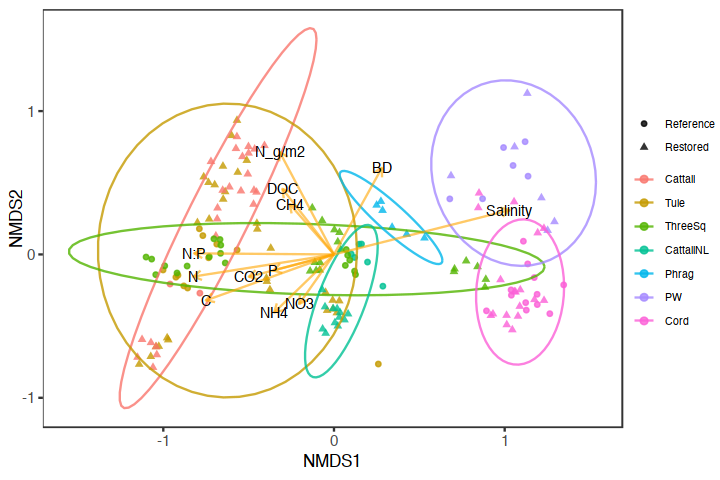

In [74]:
# Plot NMDS by plant
options(repr.plot.width=6, repr.plot.height=4)

# with environment loadings
NMDS_group_shape_fit(otu_V, Plant, Restor, Env_chem)

### Hide environment loadings

Square root transformation
Wisconsin double standardization
Run 0 stress 0.06596923 
Run 1 stress 0.0658668 
... New best solution
... Procrustes: rmse 0.004440189  max resid 0.05441862 
Run 2 stress 0.06596955 
... Procrustes: rmse 0.00442316  max resid 0.05434725 
Run 3 stress 0.06586691 
... Procrustes: rmse 0.0002734663  max resid 0.002248554 
... Similar to previous best
Run 4 stress 0.06596911 
... Procrustes: rmse 0.004446512  max resid 0.05446815 
Run 5 stress 0.0658672 
... Procrustes: rmse 0.0003272218  max resid 0.00264367 
... Similar to previous best
Run 6 stress 0.06586695 
... Procrustes: rmse 0.0002775327  max resid 0.002281209 
... Similar to previous best
Run 7 stress 0.06586675 
... New best solution
... Procrustes: rmse 2.300865e-05  max resid 0.000193049 
... Similar to previous best
Run 8 stress 0.06586662 
... New best solution
... Procrustes: rmse 0.0001403458  max resid 0.001641735 
... Similar to previous best
Run 9 stress 0.06596912 
... Procrustes: rmse 0.00

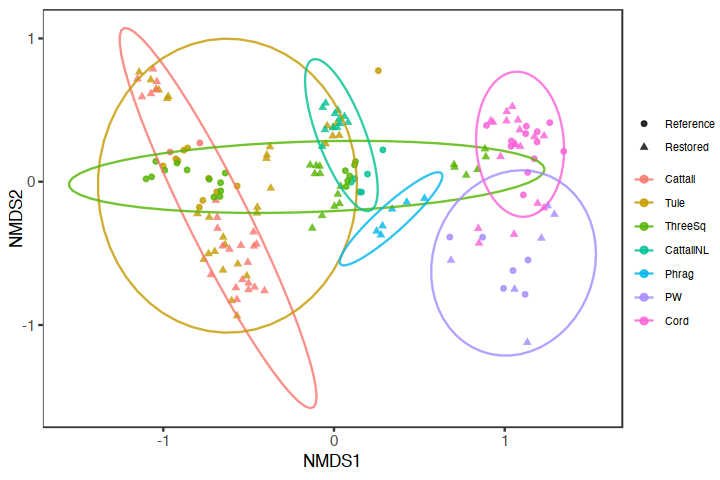

In [82]:
# note different function used, no Env_chem
figures6 <- NMDS_group_shape(otu_V, Plant, Restor)
figures6

In [83]:
pdf("../figs/FigureS6.pdf", width = 6, height = 4)
figures6
dev.off()

pdf 
  2